# Infant Mortality Indicator
- **Project: Analysis of the dynamics of COVID-19 infection in Colombia**
- **Analysis: Clustering**
- **Data: SIVIGILA - Infant maternal mortality ratio by Department in Colombia [2017-2020]**
- **Created by: Andrés Segura Tinoco**
- **Created on: July 17, 2020**

In [1]:
# Load Pandas libraries
import warnings
import pandas as pd
import numpy as np
import math
from collections import Counter

In [2]:
# Load scikit-learn library for K-Means
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Import Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cbook
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# File params
init_year = 2018
n_pc = 5
with_geo = "geo"

In [5]:
# Read raw data
csv_file = 'im_weekly_dpt_pivot_%s-2019_%s.csv' % (init_year, with_geo)
data_url = '../data/' + csv_file
rawdata = pd.read_csv(data_url, index_col=['Department'])

In [6]:
# Remove DC
remove_dc = False
if remove_dc:
    rawdata = rawdata[rawdata.index != 'BOGOTA']
rawdata

area  population    pib  last_births  perc_women   1   2   3  \
Department                                                                      
AMAZONAS         9.60        0.15   0.08         0.21       47.98   1   1   0   
ANTIOQUIA        5.57       13.40  14.39        11.48       51.68  42  35  51   
ARAUCA           2.08        0.54   0.52         0.80       49.67   3   3   3   
ATLANTICO        0.26        5.11   4.40         6.75       51.30  29  21  27   
BOGOTA           0.16       16.35  25.61        15.95       52.15  44  51  49   
BOLIVAR          2.27        4.35   3.60         5.27       50.39  20  17  16   
BOYACA           2.01        2.65   2.71         2.12       50.76   7   8  11   
CALDAS           0.69        2.05   1.59         1.35       51.58   1   2   5   
CAQUETA          7.79        0.99   0.41         1.08       49.40   4   7   4   
CASANARE         3.89        0.74   1.59         0.92       49.55   2   1   4   
CAUCA            2.57        2.86   1.77         2.33       50.51   6  16   8   
CESAR            2.01        2.13   2.16         3.48       50.55  10  13  20   
CHOCO            4.07        1.04   0.38         1.03       50.63   8   7  11   
CORDOBA          2.19        3.55   1.69         4.09       50.24  18  19  22   
CUNDINAMARCA     2.12        5.56   6.00         3.15       50.58  11  17   9   
GUAINIA          6.32        0.08   0.04         0.16       47.91   2   1   1   
GUAVIARE         4.64        0.22   0.08         0.20       46.83   0   0   1   
HUILA            1.74        2.40   1.63         2.97       50.12   6   5  14   
LA GUAJIRA       1.82        1.99   1.20         3.24       51.06  22  16  14   
MAGDALENA        2.03        2.61   1.34         3.69       49.97  12  19  23   
META             7.50        1.99   3.63         2.38       49.51   3   7   6   
NARIÑO           2.87        3.62   1.50         2.81       51.09   9   6  10   
NORTE SANTANDER  1.89        2.81   1.56         3.61       50.70  14  11   3   
PUTUMAYO         2.18        0.72   0.41         0.62       49.63   5   3   1   
QUINDIO          0.16        1.17   0.80         0.91       51.84   3   2   3   
RISARALDA        0.36        1.98   1.60         1.64       52.22   3   4   3   
SAN ANDRES       0.00        0.16   0.15         0.12       51.72   0   1   0   
SANTANDER        2.67        4.28   6.44         4.55       51.05  18   8  10   
SUCRE            0.93        1.77   0.83         2.55       49.78  11   9   6   
TOLIMA           2.06        2.92   2.12         2.45       50.47   8  11  11   
VALLE DEL CAUCA  1.94        9.57   9.68         7.83       52.54  26  29  35   
VAUPES           4.74        0.09   0.03         0.10       47.58   1   0   1   
VICHADA          8.84        0.14   0.06         0.17       47.09   1   4   2   

                  4   5  ...  43  44  45  46  47  48  49  50  51  52  
Department               ...                                          
AMAZONAS          2   0  ...   2   0   1   0   1   0   2   0   0   1  
ANTIOQUIA        38  40  ...  42  36  39  42  38  28  42  39  43  26  
ARAUCA            6   3  ...   1   2   0   1   2   2   1   1   1   3  
ATLANTICO        22  26  ...  33  29  33  34  23  26  27  24  26  27  
BOGOTA           42  42  ...  50  67  54  44  41  54  46  52  48  56  
BOLIVAR          12  20  ...  18  18  29  10  12  16  19  13  13  18  
BOYACA            4   6  ...   1  10   3   3   4   5   6   9   7   6  
CALDAS            6   8  ...   3   4   3   4   6   2   5   6   2   6  
CAQUETA           9   7  ...   4   4   5   6   1   3   2   0   3   3  
CASANARE          1   1  ...   1   1   4   2   1   4   2   1   3   0  
CAUCA            14  14  ...   5  11  11   8   9   9  16   5   9  13  
CESAR            19   6  ...  11  11  13  19  20  11  13  12  12   8  
CHOCO             5   5  ...   8   4   7   7   3   6   3  11   3   5  
CORDOBA          22  19  ...  17  24  16  18  15  22  24  17  15  19  
CUNDINAMARCA     10   6  ...  18  18  15  16 

#### Result
Data for:
- 32 Departments
- 1 DC

In [7]:
# Read departments data
dataURL = '../data/col_dpt_list.csv'
dpt_data = pd.read_csv(dataURL)

# Save zone by departments
dpt_zone = {}
for ix, row in dpt_data.iterrows():
    dpt = row['department']
    zone = row['zone']
    dpt_zone[dpt] = zone

dpt_zone

{'AMAZONAS': 'AMAZONIA',
 'CAQUETA': 'AMAZONIA',
 'GUAINIA': 'AMAZONIA',
 'GUAVIARE': 'AMAZONIA',
 'PUTUMAYO': 'AMAZONIA',
 'VAUPES': 'AMAZONIA',
 'ANTIOQUIA': 'ANDINA',
 'BOGOTA': 'ANDINA',
 'BOYACA': 'ANDINA',
 'CALDAS': 'ANDINA',
 'CUNDINAMARCA': 'ANDINA',
 'HUILA': 'ANDINA',
 'NORTE SANTANDER': 'ANDINA',
 'QUINDIO': 'ANDINA',
 'RISARALDA': 'ANDINA',
 'SANTANDER': 'ANDINA',
 'TOLIMA': 'ANDINA',
 'ATLANTICO': 'CARIBE',
 'BOLIVAR': 'CARIBE',
 'CESAR': 'CARIBE',
 'CORDOBA': 'CARIBE',
 'LA GUAJIRA': 'CARIBE',
 'MAGDALENA': 'CARIBE',
 'SAN ANDRES': 'CARIBE',
 'SUCRE': 'CARIBE',
 'ARAUCA': 'ORINOQUIA',
 'CASANARE': 'ORINOQUIA',
 'META': 'ORINOQUIA',
 'VICHADA': 'ORINOQUIA',
 'CAUCA': 'PACIFICO',
 'CHOCO': 'PACIFICO',
 'NARIÑO': 'PACIFICO',
 'VALLE DEL CAUCA': 'PACIFICO'}

## 1. Data Quality Process with Standardization

In [8]:
# Split data
dpt_list = pd.DataFrame(rawdata.index)
data = rawdata.reset_index(drop=True)
col_list = data.columns

In [9]:
# Standardize the Data
std = True
x = data.values
if std:
    x = StandardScaler().fit_transform(x)

# Show department data in temporary dataframe
df_data = pd.DataFrame(data = x, columns = col_list)
df_data.head()

area  population       pib  last_births  perc_women         1  \
0  2.615558   -0.799421 -0.592076    -0.843769   -1.583370 -0.857854   
1  1.011338    2.878471  2.279699     2.527591    1.003324  2.803586   
2 -0.377925   -0.691166 -0.503775    -0.667274   -0.401880 -0.679247   
3 -1.102411    0.577360  0.274875     1.112637    0.737663  1.642642   
4 -1.142218    3.697323  4.531363     3.864767    1.331904  2.982193   

          2         3         4         5  ...        43        44        45  \
0 -0.882141 -0.907170 -0.802464 -0.995393  ... -0.665338 -0.767294 -0.783956   
1  2.201231  3.068787  2.768051  2.891940  ...  2.712533  1.750786  2.288171   
2 -0.700766 -0.673291 -0.405740 -0.703843  ... -0.749785 -0.627400 -0.864801   
3  0.931607  1.197748  1.181155  1.531374  ...  1.952512  1.261159  1.803099   
4  3.652229  2.912868  3.164775  3.086307  ...  3.388107  3.919132  3.500853   

         46        47        48        49        50        51        52  
0 -0.913378 -0.905790 -0.888699 -0.709970 -0.874007 -0.854725 -0.763913  
1  2.809981  2.744275  1.622486  2.839880  2.534621  2.900242  1.519523  
2 -0.824727 -0.807140 -0.709328 -0.798716 -0.786607 -0.767400 -0.581238  
3  2.100770  1.264519  1.443116  1.508686  1.223610  1.415720  1.610860  
4  2.987284  3.040226  3.954301  3.194865  3.670831  3.336866  4.259646  

[5 rows x 57 columns]

## 2. Correlation matrix between Features

In [10]:
# Calculate department correlations
corr = df_data.corr()

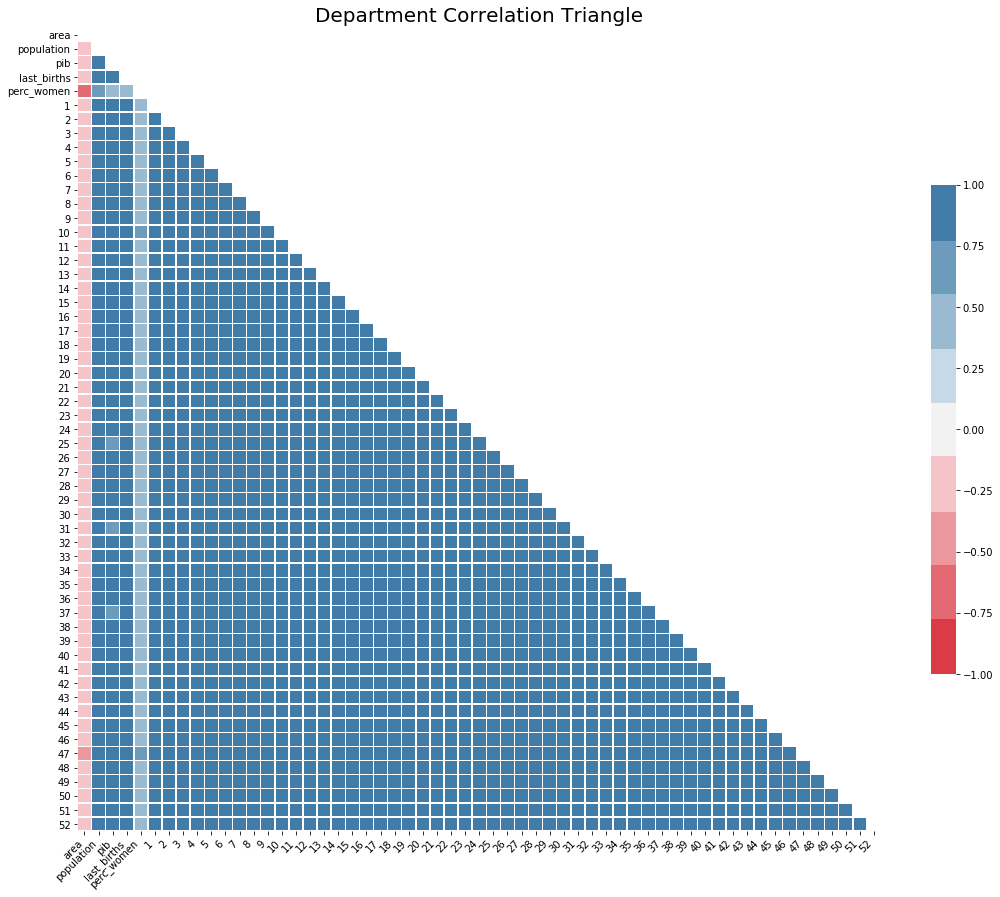

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Department Correlation Triangle", fontsize = 20)
plt.show()

## 3. PCA Process

In [12]:
# Set color list
color_list = ["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [13]:
# Palette by positions dictionary
zone_palette = dict()
zone_palette["AMAZONIA"] = color_list[0]
zone_palette["ANDINA"] = color_list[1]
zone_palette["CARIBE"] = color_list[2]
zone_palette["ORINOQUIA"] = color_list[3]
zone_palette["PACIFICO"] = color_list[4]
zone_palette["EXTERIOR"] = color_list[5]

In [14]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)

In [15]:
# Function that replace the player position by the zone
def add_zone(data):
    data["Zone"] = data["Department"]
    data["Color"] = data["Department"]
    
    for k, v in dpt_zone.items():
        data["Zone"] = data["Zone"].replace(k, v)
        data["Color"] = data["Color"].replace(k, zone_palette[v])
    
    return data

In [16]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, dpt_list], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca = add_zone(df_pca)
df_pca.head(50)

PC1       PC2       PC3       PC4       PC5       Department  \
0   -6.273529  2.545615  0.213960 -0.031486 -0.009645         AMAZONAS   
1   19.007916  2.084854 -1.547399  2.511117  0.102358        ANTIOQUIA   
2   -5.310555 -0.421974  0.003920  0.115005 -0.025090           ARAUCA   
3   10.172649 -0.857107 -1.952505 -1.964480 -0.848013        ATLANTICO   
4   24.685746  0.332877  2.667139 -1.448871  1.014265           BOGOTA   
5    5.150148  0.070322 -1.281189 -0.124381  1.588537          BOLIVAR   
6   -2.763688 -0.775179  0.821805  0.548941 -0.174460           BOYACA   
7   -3.957359 -1.518818  0.045552  0.342273  0.675284           CALDAS   
8   -4.560491  1.524328  0.101222  0.080173 -0.029562          CAQUETA   
9   -5.321531  0.184284  0.259745  0.057370  0.245388         CASANARE   
10   0.025916 -0.251074 -0.260012 -0.298615 -0.060979            CAUCA   
11   1.461583 -0.404950 -0.312255  0.923274 -1.392958            CESAR   
12  -2.734516 -0.019735  0.008448  0.562819  0.485755            CHOCO   
13   5.262095  0.062000 -0.214054 -1.301654 -1.517880          CORDOBA   
14   2.179632 -0.337894  0.677536 -0.331429 -0.885827     CUNDINAMARCA   
15  -6.574319  1.573835  0.135840 -0.135960  0.085188          GUAINIA   
16  -6.533574  1.503246  0.160417 -0.621729 -0.066942         GUAVIARE   
17  -1.470865 -0.383153 -0.207182 -0.134550 -0.277730            HUILA   
18   3.094594 -0.442821 -1.550718 -0.597020  0.887055       LA GUAJIRA   
19   1.803480 -0.129204 -0.620972 -0.100192 -0.620172        MAGDALENA   
20  -2.565457  1.481686  0.524348 -0.212970  0.292086             META   
21  -0.210091 -0.487079  0.221878  0.327671 -0.864018           NARIÑO   
22  -0.164811 -0.698084 -0.530235 -0.146557  0.632717  NORTE SANTANDER   
23  -5.195692 -0.358558  0.164685 -0.127599  0.013621         PUTUMAYO   
24  -4.805774 -1.926564  0.192921  0.228275  0.444156          QUINDIO   
25  -3.523008 -2.008222  0.088060  0.297675  0.317900        RISARALDA   
26  -6.176616 -2.010274  0.241603  0.166713  0.185556       SAN ANDRES   
27  -0.110853 -0.579549  1.338277  0.573123 -0.340968        SANTANDER   
28  -1.072347 -0.495231 -0.640437 -0.623549  0.367485            SUCRE   
29  -1.465592 -0.479418  0.045919  0.751521  0.202693           TOLIMA   
30  10.644934 -0.708607  0.907664  1.428379 -0.522208  VALLE DEL CAUCA   
31  -6.578643  1.197754  0.107960 -0.427706  0.116893           VAUPES   
32  -6.119381  2.732694  0.188057 -0.285581 -0.020483          VICHADA   

         Zone    Color  
0    AMAZONIA  #1f77b4  
1      ANDINA  #ff7f0e  
2   ORINOQUIA  #2ca02c  
3      CARIBE  #d62728  
4      ANDINA  #ff7f0e  
5      CARIBE  #d62728  
6      ANDINA  #ff7f0e  
7      ANDINA  #ff7f0e  
8    AMAZONIA  #1f77b4  
9   ORINOQUIA  #2ca02c  
10   PACIFICO  #9467bd  
11     CARIBE  #d62728  
12   PACIFICO  #9467bd  
13     CARIBE  #d62728  
14     ANDINA  #ff7f0e  
15   AMAZONIA  #1f77b4  
16   AMAZONIA  #1f77b4  
17     ANDINA  #ff7f0e  
18     CARIBE  #d62728  
19     CARIBE  #d62728  
20  ORINOQUIA  #2ca02c  
21   PACIFICO  #9467bd  
22     ANDINA  #ff7f0e  
23   AMAZONIA  #1f77b4  
24     ANDINA  #ff7f0e  
25     ANDINA  #ff7f0e  
26     CARIBE  #d62728  
27     ANDINA  #ff7f0e  
28     CARIBE  #d62728  
29     ANDINA  #ff7f0e  
30   PACIFICO  #9467bd  
31   AMAZONIA  #1f77b4  
32  ORINOQUIA  #2ca02c

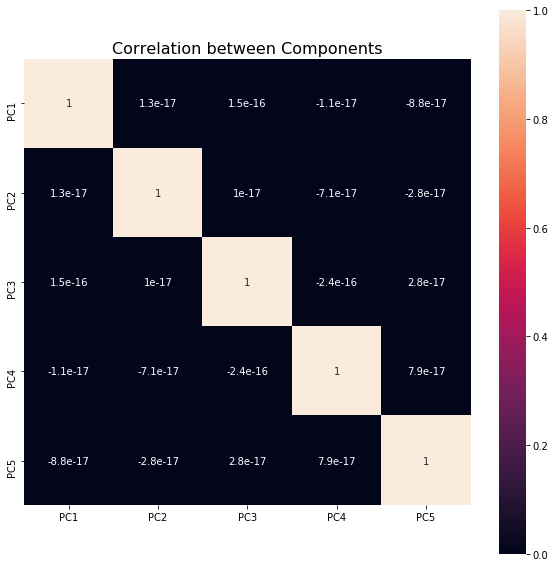

In [17]:
# Show correlation between components
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 4. PCA Variance Ratio

In [18]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.8975443043221134,
 0.025311988662556576,
 0.01229141604624226,
 0.010909069672118235,
 0.007178814472044436]

In [19]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

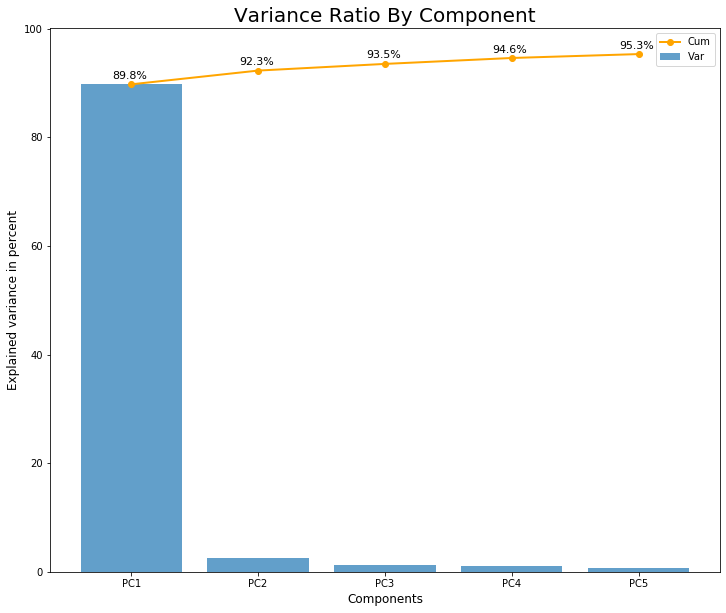

In [20]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize=(12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

## 5. PCs Dependencies

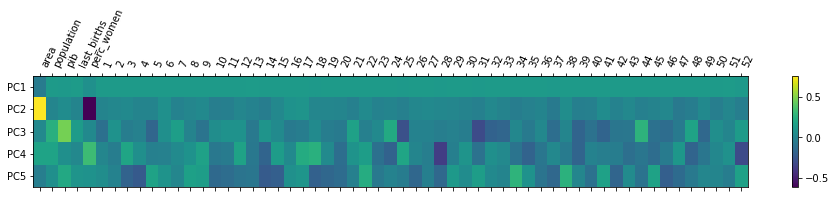

In [21]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. The first 2 components

In [22]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

92.285629298467

In [23]:
# Eigen-vectors data
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [24]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

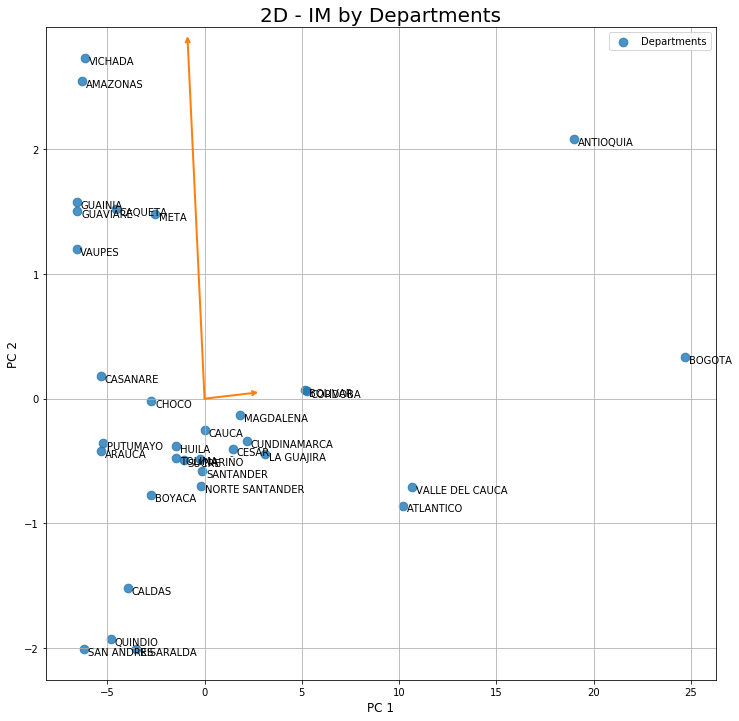

In [25]:
# Create scatter plot with players label
fig, ax3 = plt.subplots(figsize=(12, 12))

# Create 2D scatter plot
plot = sns.regplot(ax=ax3, data=df_pca, x="PC1", y="PC2", fit_reg=False,
                   marker="o", color="#1f77b4", scatter_kws={"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.Department[ix],
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D - IM by Departments", fontsize = 20)
ax3.legend(["Departments"])
ax3.grid()

### 6.2. The first 3 components

In [26]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

93.51477090309123

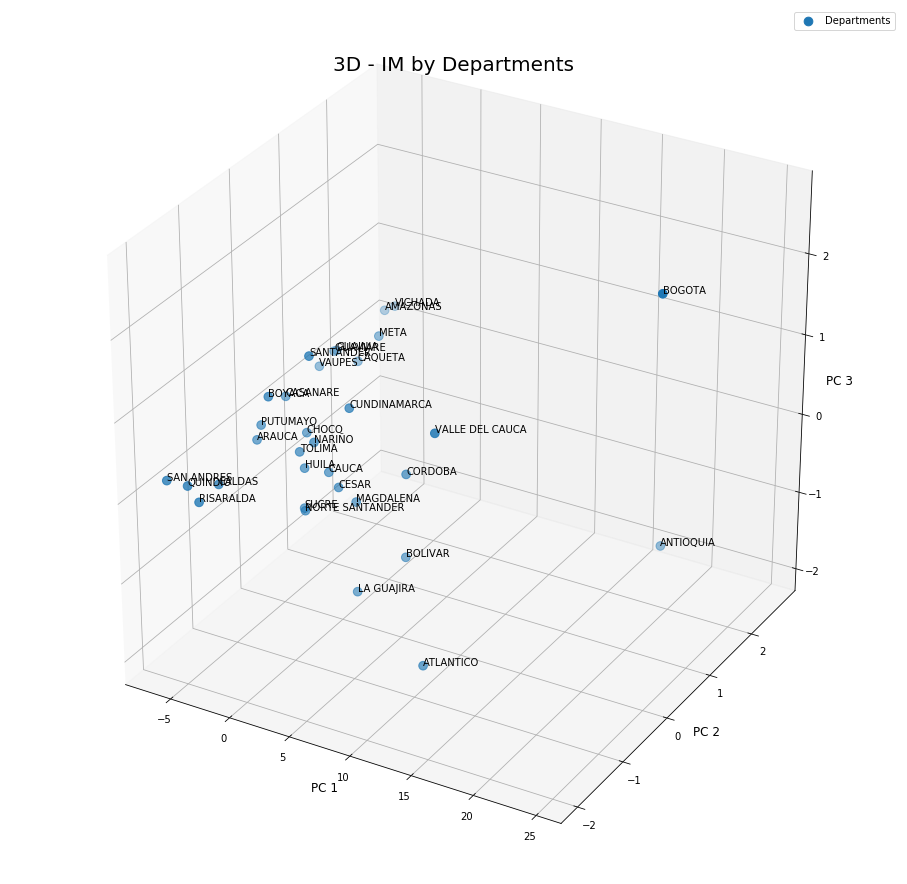

In [27]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
yy = df_pca.loc[:,["PC2"]].values
zz = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.Department[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D - IM by Departments", fontsize = 20)
ax4.legend(["Departments"])
ax4.grid()

## 7. Clustering: K-Means

### 7.1. Calculating the Jambu elbow

In [28]:
# Creating training dataset
if n_pc == 2:
    n_cluster = 5
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    ds_train = np.array(list(zip(x, y)))
elif n_pc == 3:
    n_cluster = 6
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    z = df_pca['PC2'].values
    ds_train = np.array(list(zip(x, y, z)))
else:
    n_cluster = 7
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    z = df_pca['PC3'].values
    a = df_pca['PC4'].values
    b = df_pca['PC5'].values
    ds_train = np.array(list(zip(x, y, z, a, b)))
print('Nro. PCs: %s and Nro. Clusters: %s' % (n_pc, n_cluster))

Nro. PCs: 5 and Nro. Clusters: 7


In [29]:
# Calculating the Jambu Elbow scores
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(ds_train).inertia_ for i in range(len(kmeans))]

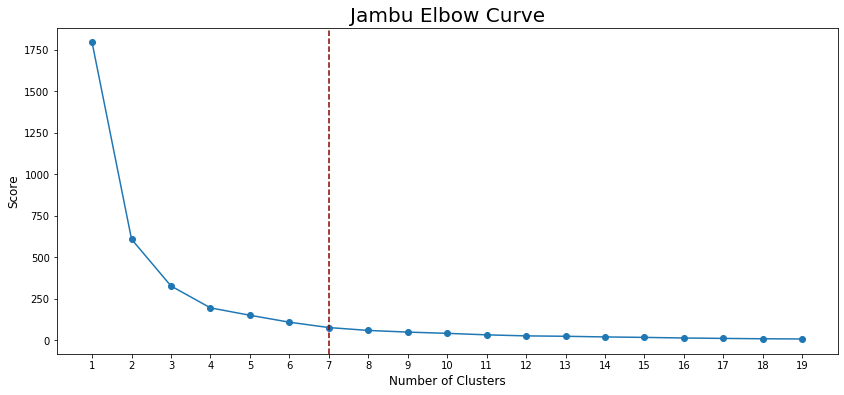

In [30]:
# Plot the results
fig, ax0 = plt.subplots(figsize=(14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x=n_cluster, color="#8b0000", linestyle="--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Jambu Elbow Curve", fontsize = 20)
plt.show()

### 7.2. Clustering the data

In [31]:
# Calculates the K-Means for (x, y) dataset
def run_kmeans(k_clusters, labels):
    
    # Algorithms = {'auto', 'full', 'elkan'}
    kmeans = KMeans(n_clusters=k_clusters, algorithm="full", random_state=0, max_iter=500)
    kmeans = kmeans.fit(ds_train)
    
    # Getting the cluster labels
    clusters = kmeans.predict(ds_train)
    
    # Centroid values
    centroids = kmeans.cluster_centers_
    
    # Plotting K-Means result
    plot_kmeans_data(ds_train, k_clusters, centroids, clusters, labels)
    
    return clusters, centroids

In [32]:
# Create scatter plot with K-Means data
def plot_kmeans_data(data, k_clusters, centroids, clusters, labels):
    fig, ax = plt.subplots(figsize=(14, 14))
    
    # Plotting vars
    legend_list = []
    n_data = len(data)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=25, color="gray", marker="D")
    for i in range(k_clusters):
        legend_list.append(mpatches.Patch(color=color_list[i], label='Cluster ' + str(i + 1)))
        if labels:
            ax.text(centroids[i][0] + 0.1, centroids[i][1] - 0.1, str(i + 1), fontsize=20)
    
    # Plot data
    for i in range(k_clusters):
        points = np.array([data[j] for j in range(n_data) if clusters[j] == i])
        sns.scatterplot(ax=ax, x=points[:, 0], y=points[:, 1], s=100, color=color_list[i])
    
    # Add annotations one by one with a loop
    if labels:
        for ix in range(0, df_pca.shape[0]):
            ax.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.1, df_pca.Department[ix],
                    horizontalalignment = "left", size = "medium", color = "black", weight = "normal")
    
    # Plot setup
    ax.set_xlabel("PC 1", fontsize = 12)
    ax.set_ylabel("PC 2", fontsize = 12)
    ax.set_title("IM Clustering", fontsize = 20)
    ax.grid()
    plt.legend(handles=legend_list)
    plt.show()

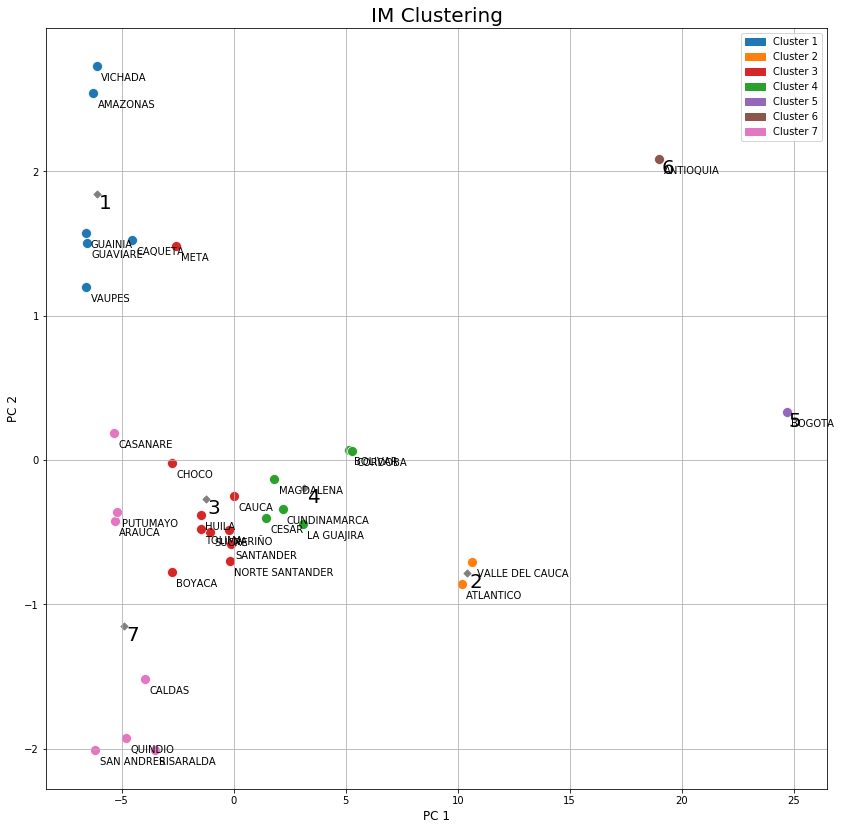

In [33]:
# Create interactive control to control k value
clusters, centroids = run_kmeans(k_clusters=n_cluster, labels=True)

### 7.3. Show natural grouping by Regions

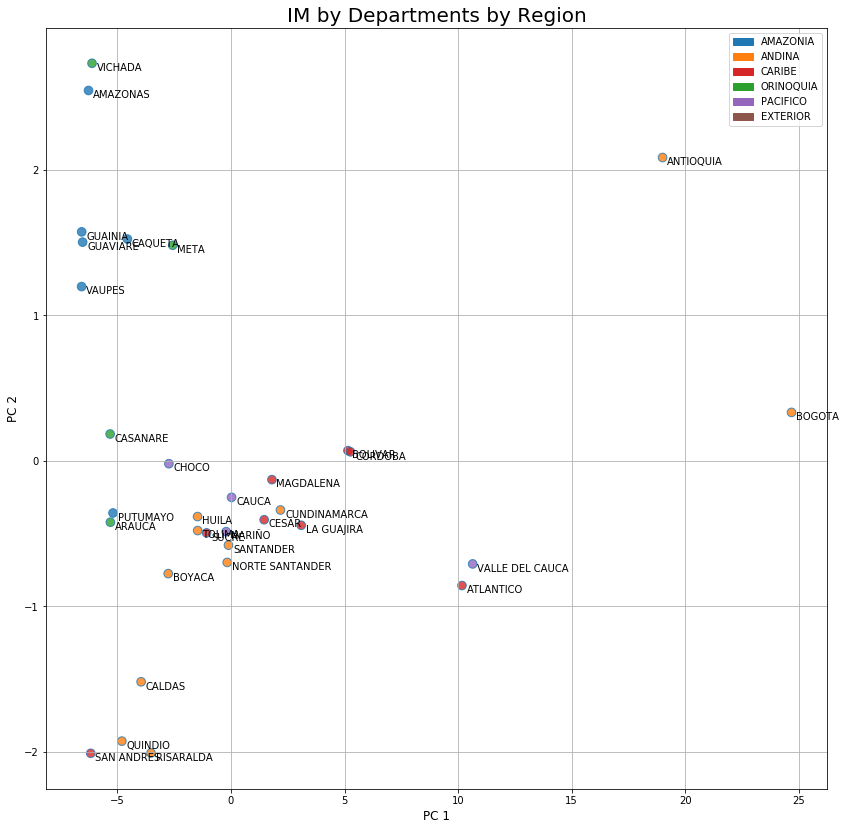

In [34]:
# Create scatter plot with players label
fig, ax5 = plt.subplots(figsize=(14, 14))

# Plotting vars
legend_list = []
for k, v in zone_palette.items():
    legend_list.append(mpatches.Patch(color=v, label=k))

# Create 2D scatter plot
plot = sns.regplot(ax=ax5, data=df_pca, x="PC1", y="PC2", fit_reg=False,
                   marker="o", scatter_kws={"s":75, "facecolors":df_pca["Color"]})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.Department[ix],
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax5.set_xlabel("PC 1", fontsize = 12)
ax5.set_ylabel("PC 2", fontsize = 12)
ax5.set_title("IM by Departments by Region", fontsize=20)
ax5.grid()
plt.legend(handles=legend_list)
plt.show()

## 8. Clusters Description

In [35]:
# CLustering results dataframe
df_result = pd.DataFrame(columns=["n_item", "std_dev", "n_item_2", "w_std_dev"])

### 8.1. Cluster sizes

In [36]:
cluster_count = Counter()
for ix in clusters:
    c_name = str(ix + 1)
    cluster_count[c_name] += 1

# Cooking dataframe
df = pd.DataFrame.from_records(cluster_count.most_common(), columns = ['cluster', 'frequency']).sort_values(by=['cluster'])

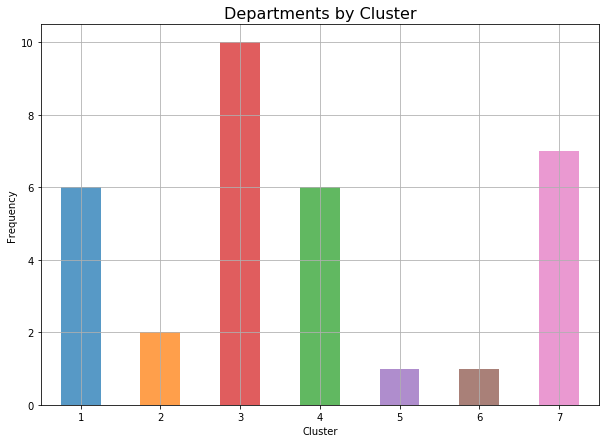

In [37]:
fig, ax = plt.subplots()
df.plot.bar(ax=ax, x='cluster', y='frequency', alpha=0.75, figsize=(10, 7), color=color_list)
plt.title('Departments by Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
ax.get_legend().remove()
ax.grid()
plt.xticks(rotation=0)
plt.show()

### 7.2. Regions by cluster

In [38]:
cluster_data = Counter()
for ix, row in df_pca.iterrows():
    cluster = str(clusters[ix] + 1)
    zone = row['Zone']
    
    if not cluster in cluster_data:
        cluster_data[cluster] = Counter()
    cluster_data[cluster][zone] += 1

sorted(cluster_data.items())

[('1', Counter({'AMAZONIA': 5, 'ORINOQUIA': 1})),
 ('2', Counter({'CARIBE': 1, 'PACIFICO': 1})),
 ('3', Counter({'ANDINA': 5, 'PACIFICO': 3, 'ORINOQUIA': 1, 'CARIBE': 1})),
 ('4', Counter({'CARIBE': 5, 'ANDINA': 1})),
 ('5', Counter({'ANDINA': 1})),
 ('6', Counter({'ANDINA': 1})),
 ('7', Counter({'ORINOQUIA': 2, 'ANDINA': 3, 'AMAZONIA': 1, 'CARIBE': 1}))]

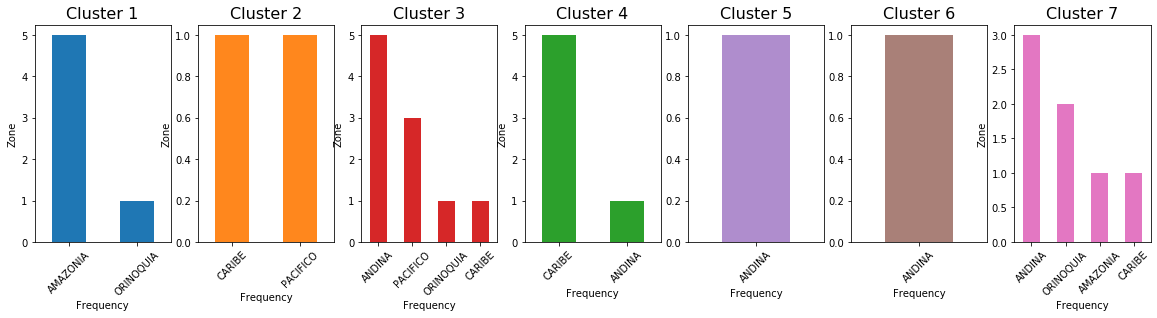

In [39]:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fig = plt.figure(figsize = (20, 4))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

for ix in clusters:
    ax = plt.subplot(1, n_cluster, ix + 1)
    c_name = str(ix + 1)
    data = cluster_data[str(c_name)].most_common()
    df = pd.DataFrame.from_records(data, columns = ['zone', 'frequency']).sort_values(by='frequency', ascending=False)
    df.plot.bar(ax=ax, x='zone', y='frequency', color=color_list[ix], alpha=0.75)
    ax.get_legend().remove()
    plt.title('Cluster ' + c_name, fontsize=16)
    plt.xlabel('Frequency')
    plt.ylabel('Zone')
    plt.xticks(rotation=45)

plt.show()

### 7.3. Departments by cluster

In [40]:
dpt_cluster = {}
for i in range(n_cluster):
    cluster_name = (i+1)
    dpt_list = []
    print('>> Cluster %s:' % cluster_name)
    
    for j in range(len(clusters)):
        if i == clusters[j]:
            dpt_list.append(df_pca.iloc[j]['Department'])
    
    dpt_cluster[cluster_name] = dpt_list
    print('  ', dpt_list)

>> Cluster 1:
   ['AMAZONAS', 'CAQUETA', 'GUAINIA', 'GUAVIARE', 'VAUPES', 'VICHADA']
>> Cluster 2:
   ['ATLANTICO', 'VALLE DEL CAUCA']
>> Cluster 3:
   ['BOYACA', 'CAUCA', 'CHOCO', 'HUILA', 'META', 'NARIÑO', 'NORTE SANTANDER', 'SANTANDER', 'SUCRE', 'TOLIMA']
>> Cluster 4:
   ['BOLIVAR', 'CESAR', 'CORDOBA', 'CUNDINAMARCA', 'LA GUAJIRA', 'MAGDALENA']
>> Cluster 5:
   ['BOGOTA']
>> Cluster 6:
   ['ANTIOQUIA']
>> Cluster 7:
   ['ARAUCA', 'CALDAS', 'CASANARE', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES']


### 7.4. Show data by Departments by Cluster

In [41]:
# Read raw data
data_url = "../data/im_weekly_dpt_data.csv"
dptdata = pd.read_csv(data_url, parse_dates=["date"])
dptdata

department       date  value
0            AMAZONAS 2017-01-01      0
1           ANTIOQUIA 2017-01-01     22
2              ARAUCA 2017-01-01      0
3           ATLANTICO 2017-01-01     13
4              BOGOTA 2017-01-01     20
...               ...        ...    ...
5391        SANTANDER 2020-02-16      3
5392            SUCRE 2020-02-16      1
5393           TOLIMA 2020-02-16      2
5394  VALLE DEL CAUCA 2020-02-16      2
5395          VICHADA 2020-02-16      2

[5396 rows x 3 columns]

In [42]:
dpt_ts = {}
for cluster, departments in dpt_cluster.items():
    for dpt in departments:
        df = dptdata[dptdata['department'] == dpt]
        ts = df.set_index('date')['value'].asfreq(freq='W')
        dpt_ts[dpt] = ts

In [43]:
# Average a list of time series
def avg_time_series(ts_data, ts_list, allow_dbl, c_name):
    avg_ts = None
    df = None
    n = len(ts_list)
    
    for dpt in ts_list:
        ts = ts_data[dpt]
        
        if avg_ts is None:
            avg_ts = ts
            df = pd.DataFrame(ts)
        else:
            avg_ts = avg_ts.add(ts, fill_value=0)
            df = pd.concat([df, pd.DataFrame(ts)], axis=1, sort=False)
    avg_ts = avg_ts / n
    
    if not allow_dbl:
        avg_ts = math.ceil(avg_ts)
    
    std_dev = 0
    max_value = 0
    if len(df.columns) > 1:
        for ix, row in df.iterrows():
            values = np.nan_to_num(row.values)
            max_value = max(np.max(values), max_value)
            std_dev += np.std(values)
        std_dev = 100.0 * std_dev / len(df) / max_value
    
    print('n time series:', n, ', std dev:', std_dev, 'max value:', max_value)
    df_result.loc[c_name - 1] = [n, std_dev, n * n, n * std_dev]
    
    return avg_ts

In [44]:
# Plot trends by year
def plot_cluster_curves(data, dpt_list, c_name, allow_dbl=True):
    plt.figure(figsize=(18, 5), dpi=200)
    
    # Plot all curves
    for dpt in dpt_list:
        ts = data[dpt]
        plt.plot(ts, label=dpt, alpha=0.25)
    
    # Plot average curve
    avg_ts = avg_time_series(data, dpt_list, allow_dbl, c_name)
    plt.plot(avg_ts, label='average', alpha=1, color='black')
        
    plt.title('Cluster %s IM trends' % c_name, fontsize=16)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Num. Deaths', fontsize=10)
    plt.xticks(fontsize=10)
    plt.legend()
    plt.show()

n time series: 6 , std dev: 12.346985667815478 max value: 7.0


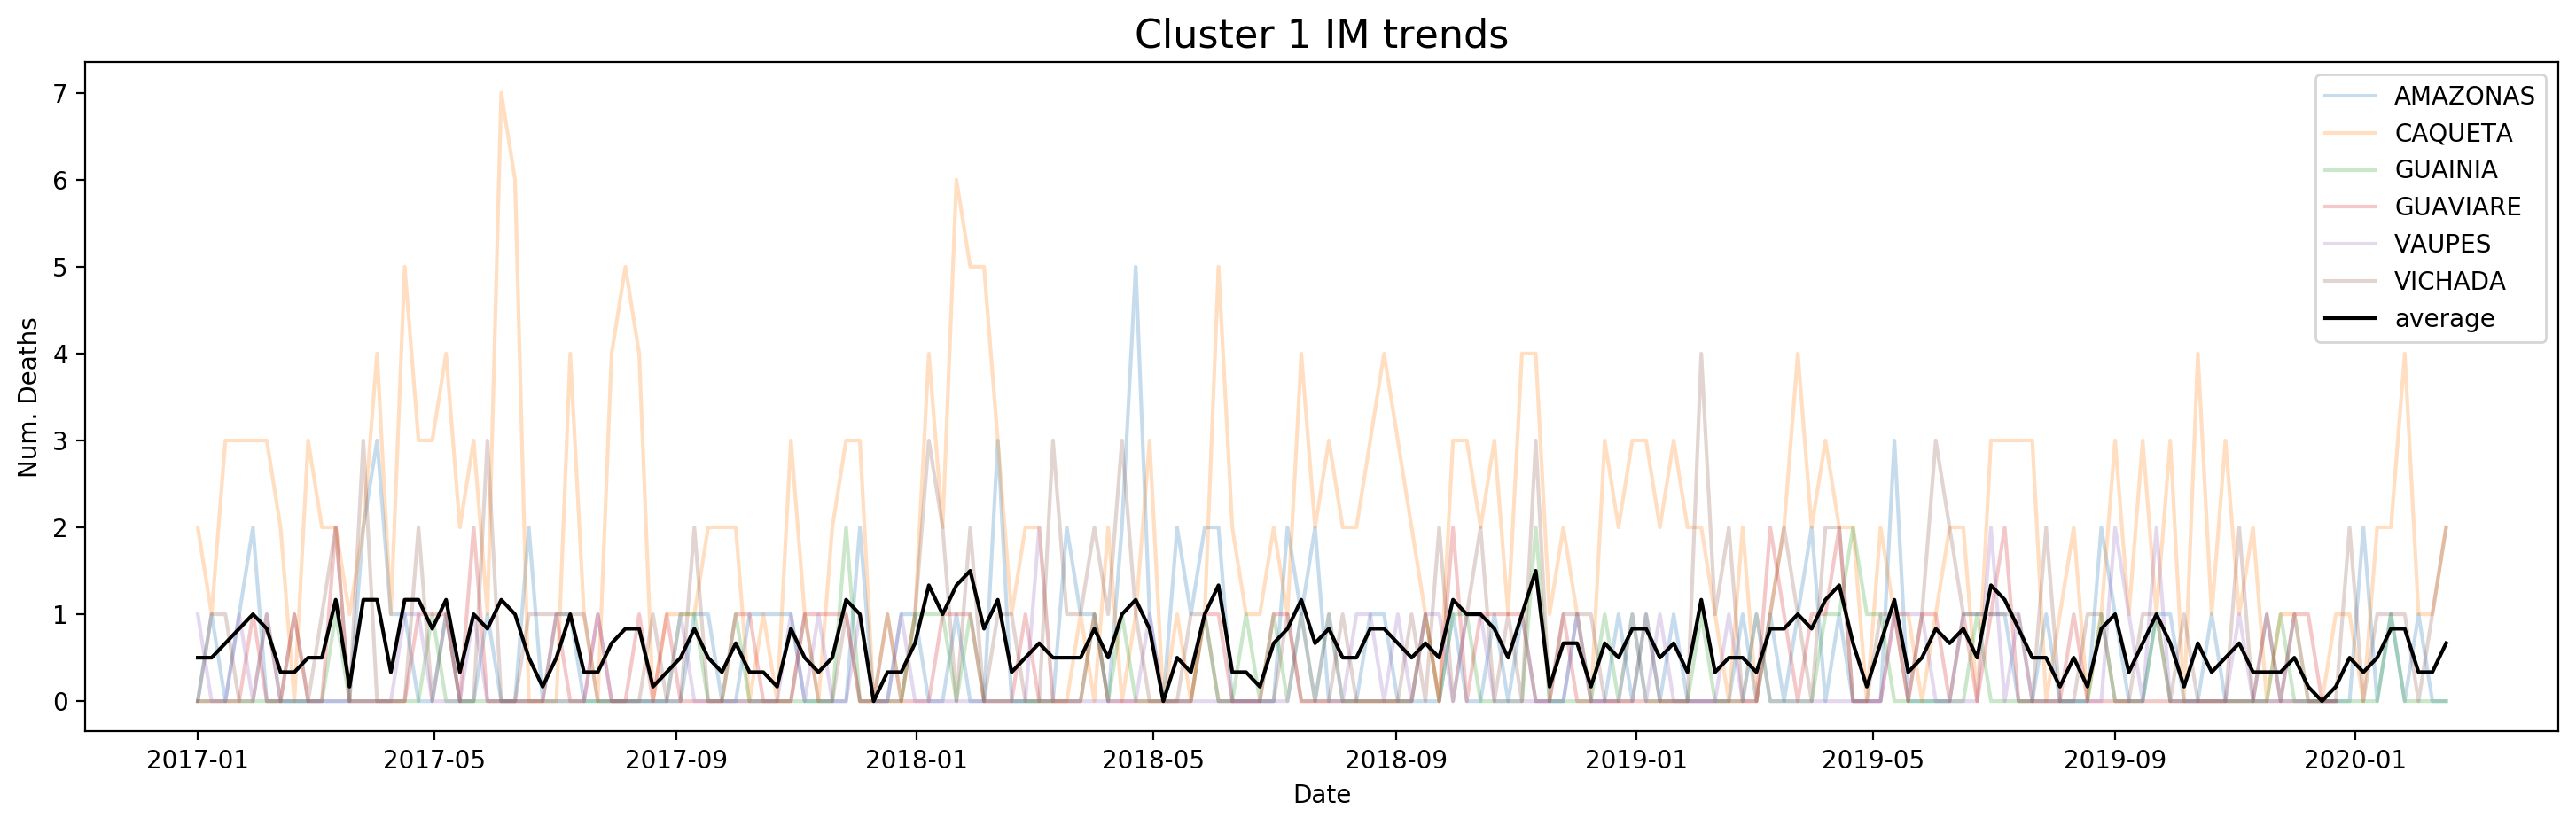

In [45]:
# Plot cluster 1
c_name = 1
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 2 , std dev: 7.877655389457121 max value: 31


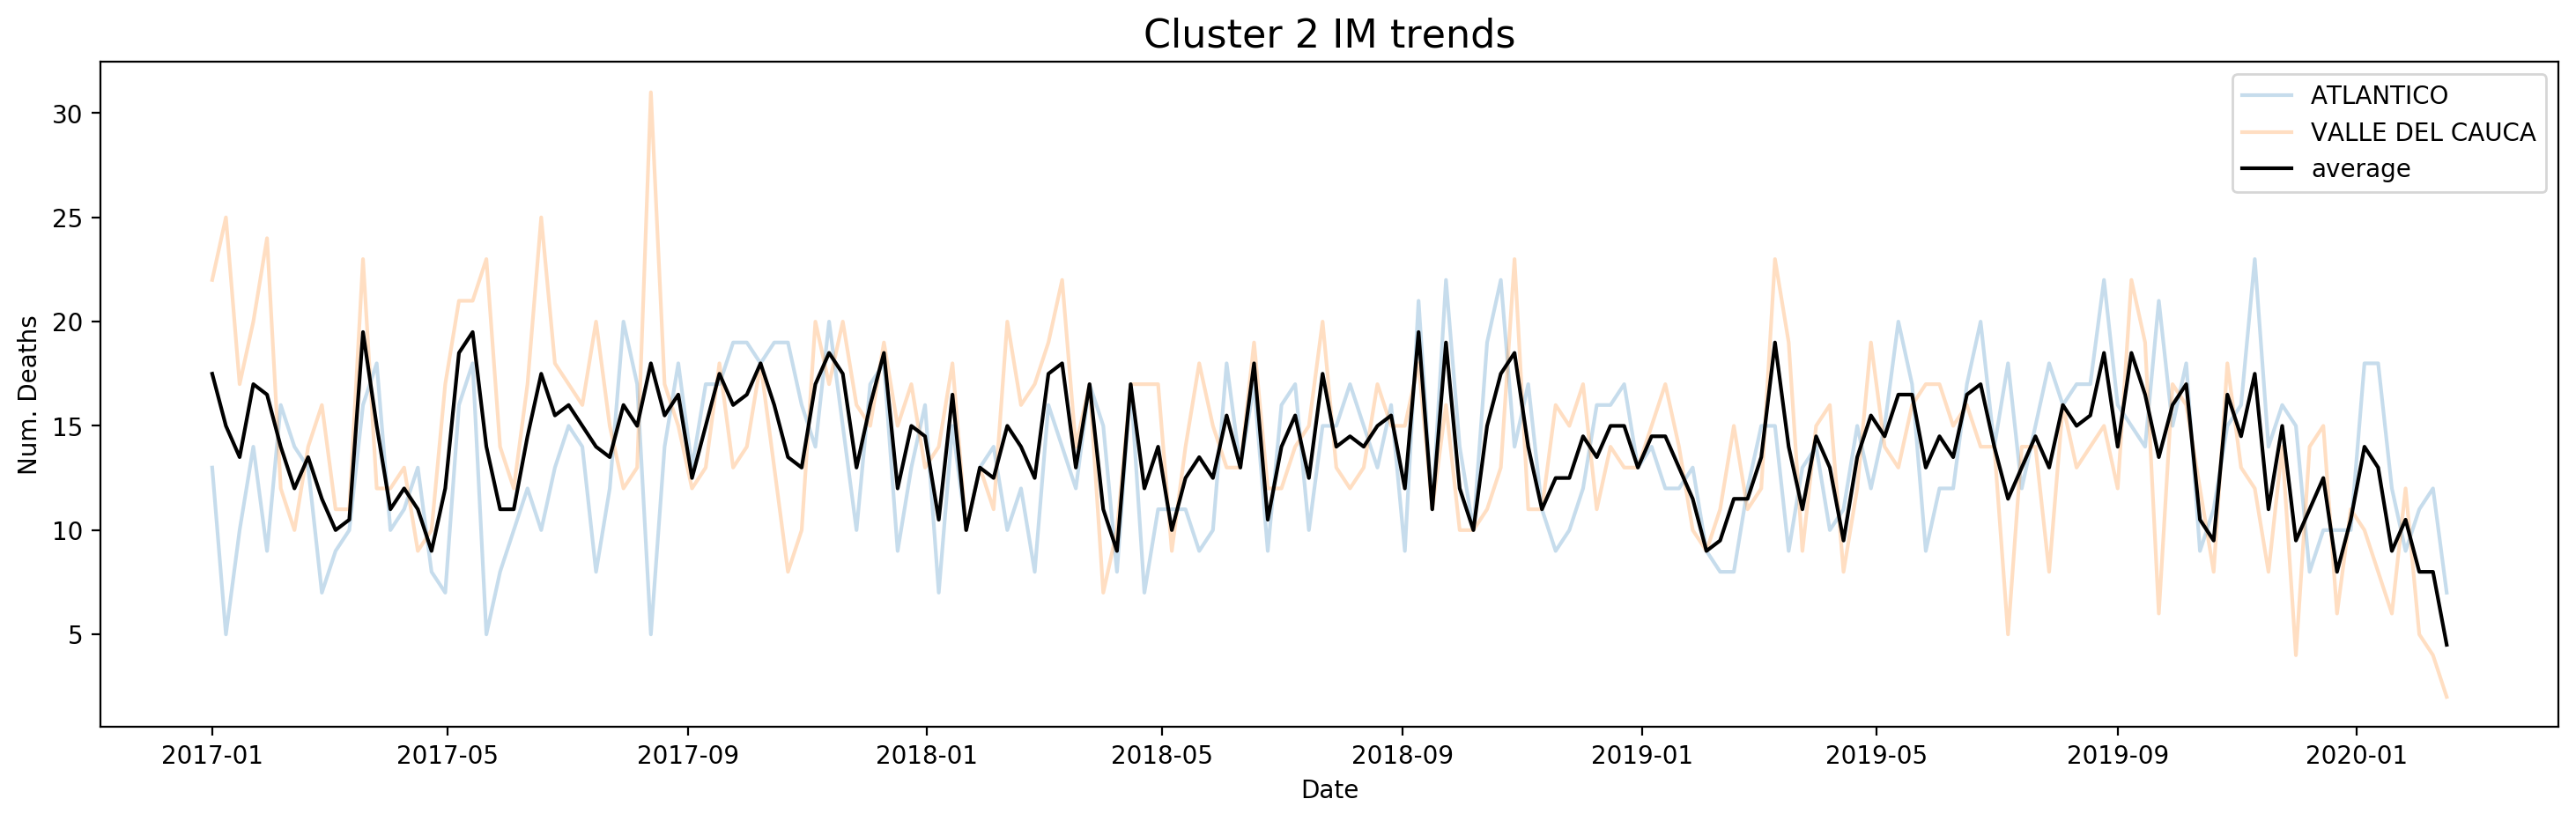

In [46]:
# Plot cluster 2
c_name = 2
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 10 , std dev: 16.11146159647471 max value: 14


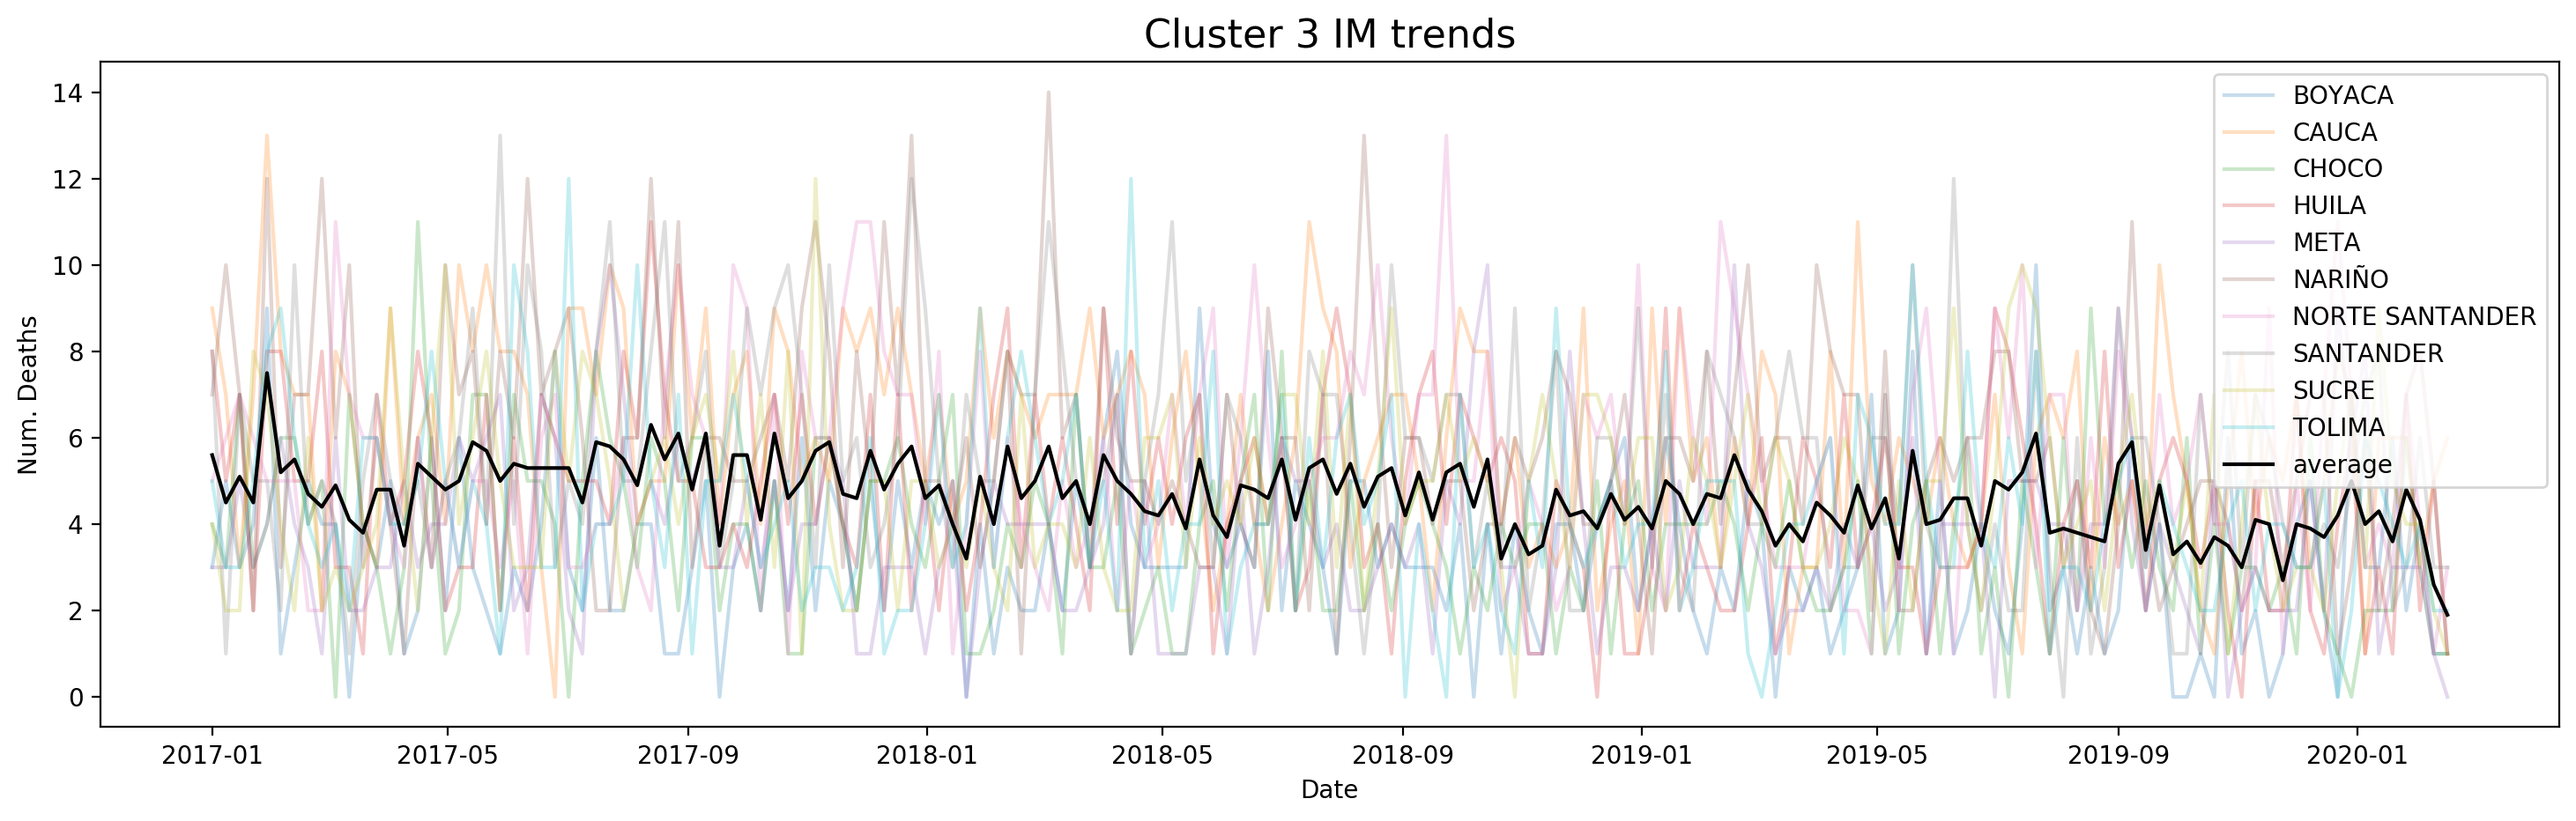

In [47]:
# Plot cluster 3
c_name = 3
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 6 , std dev: 13.837552806011525 max value: 22


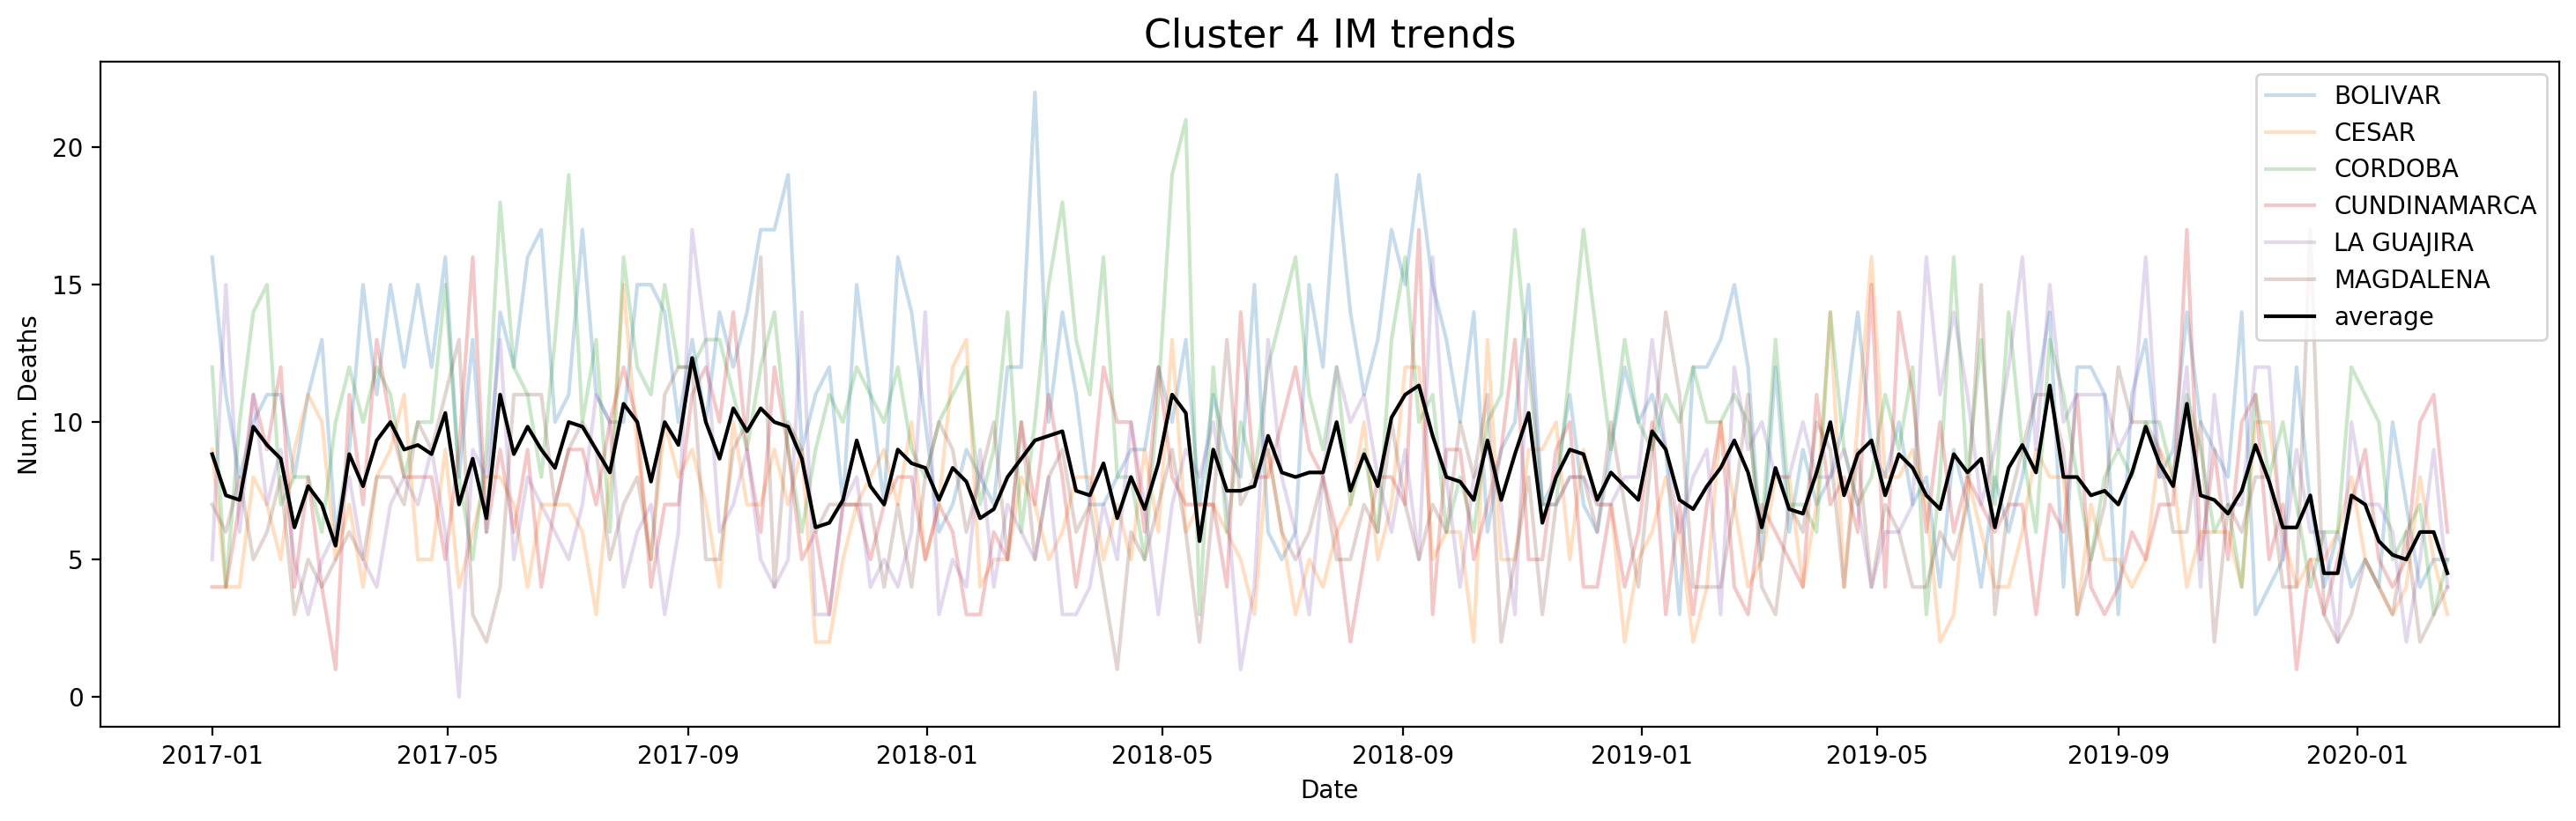

In [48]:
# Plot cluster 4
c_name = 4
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 1 , std dev: 0 max value: 0


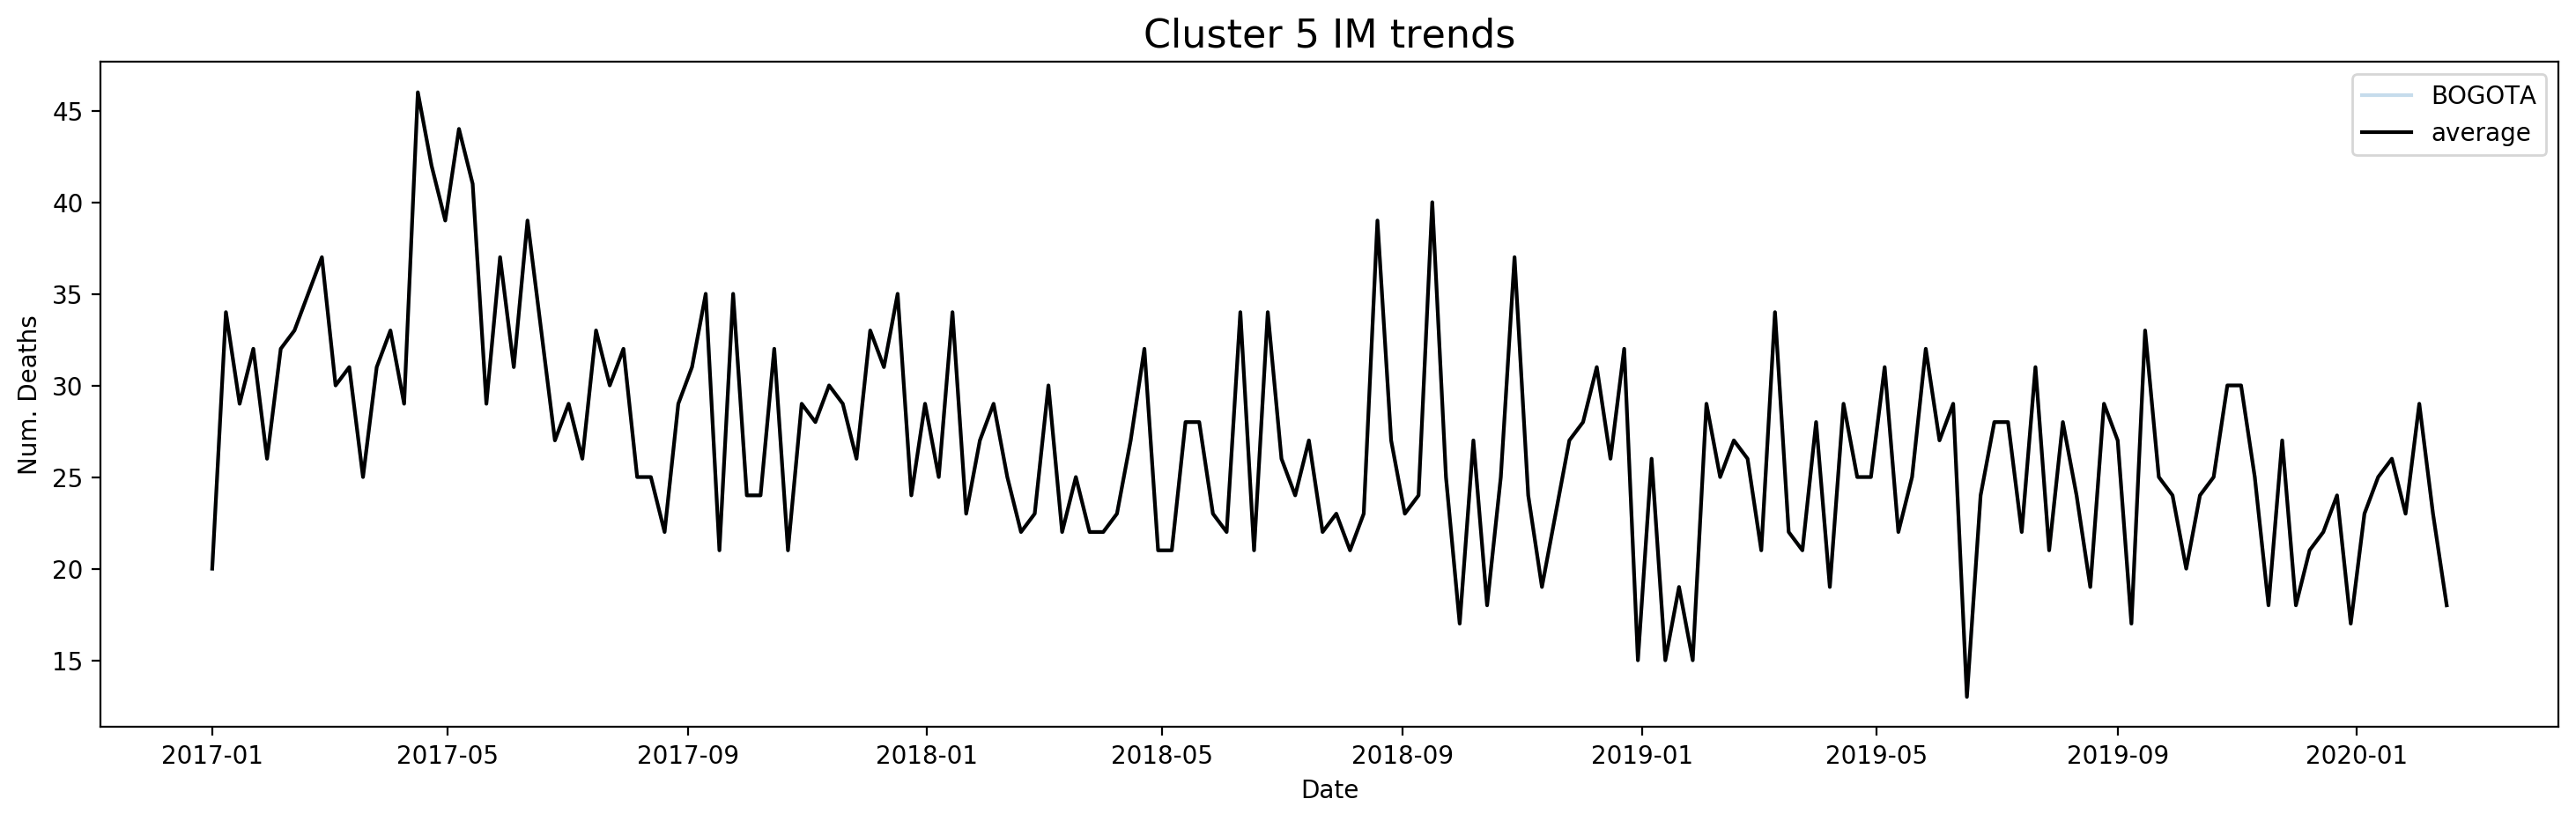

In [49]:
# Plot cluster 5
if n_cluster > 4:
    c_name = 5
    plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 1 , std dev: 0 max value: 0


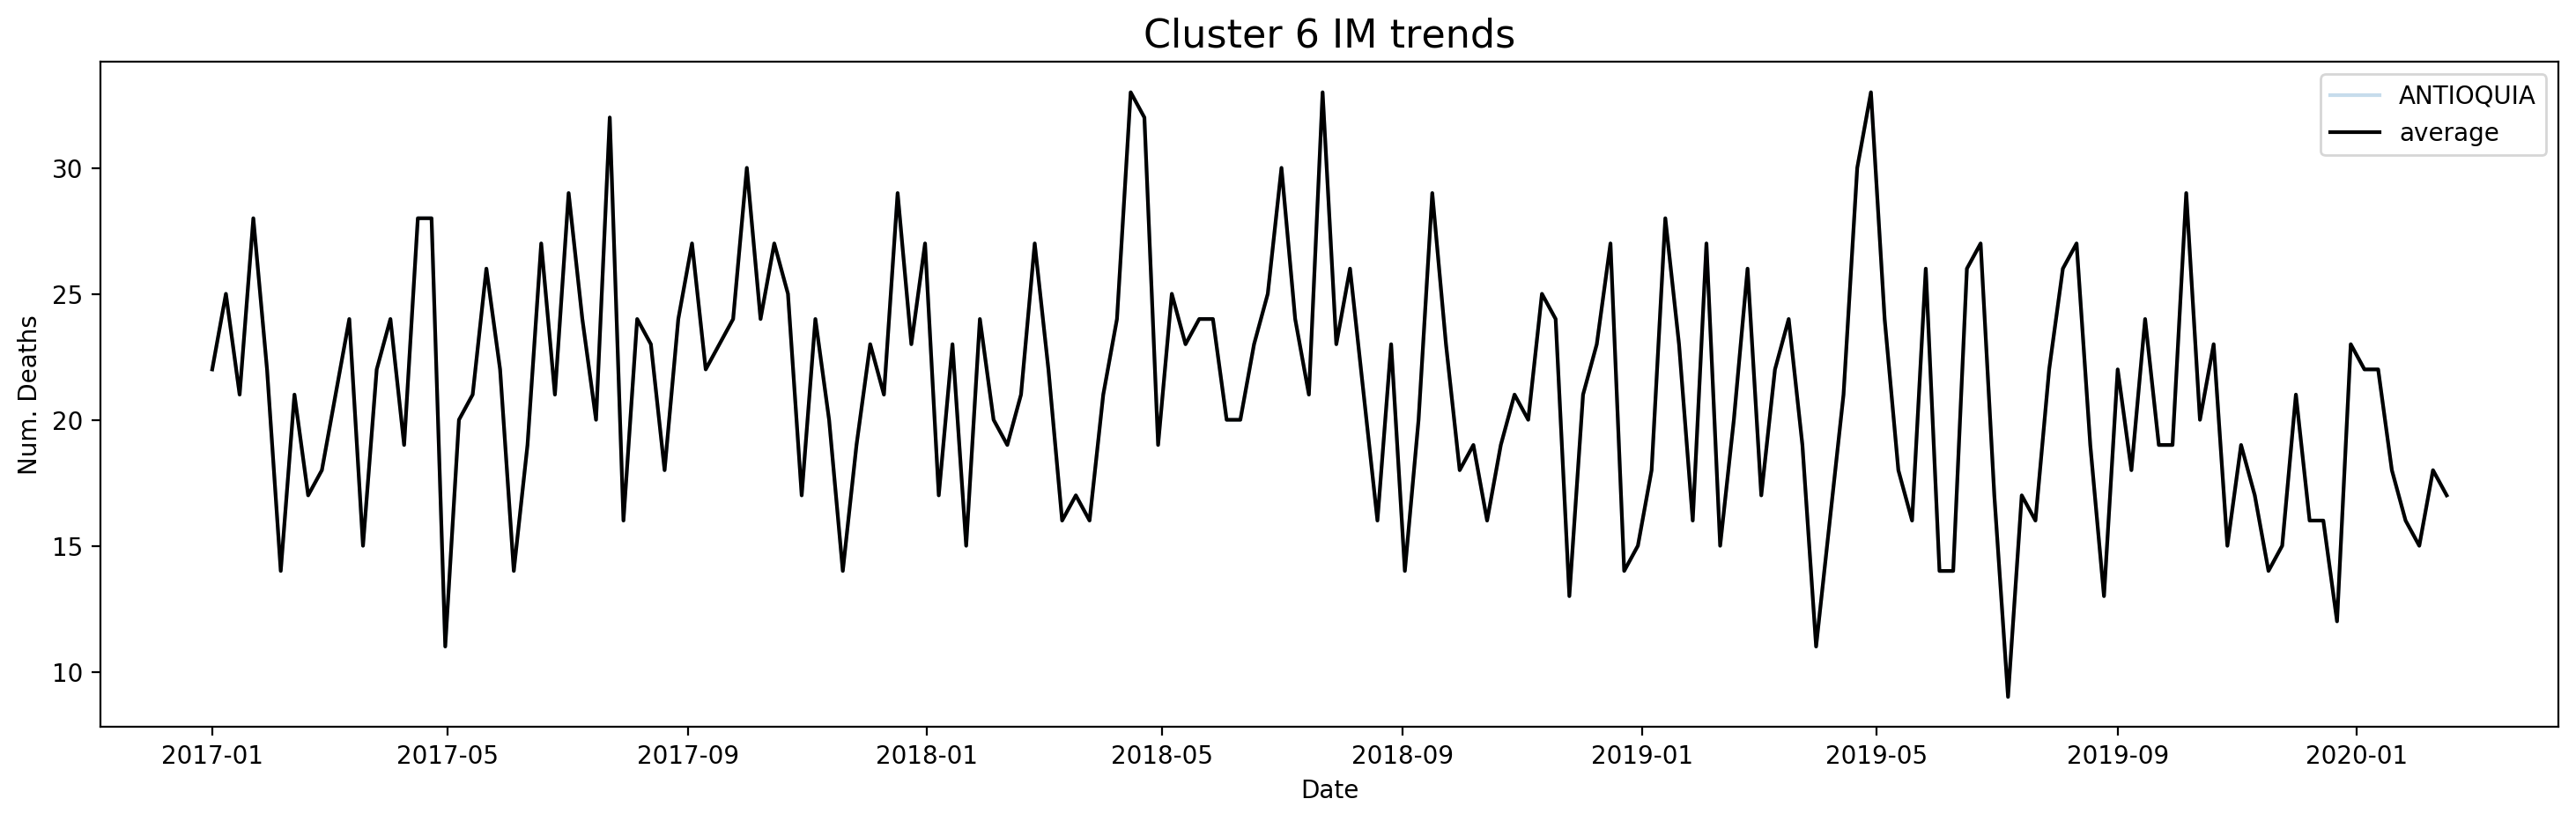

In [50]:
# Plot cluster 6
if n_cluster > 5:
    c_name = 6
    plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 7 , std dev: 15.713717647062198 max value: 8


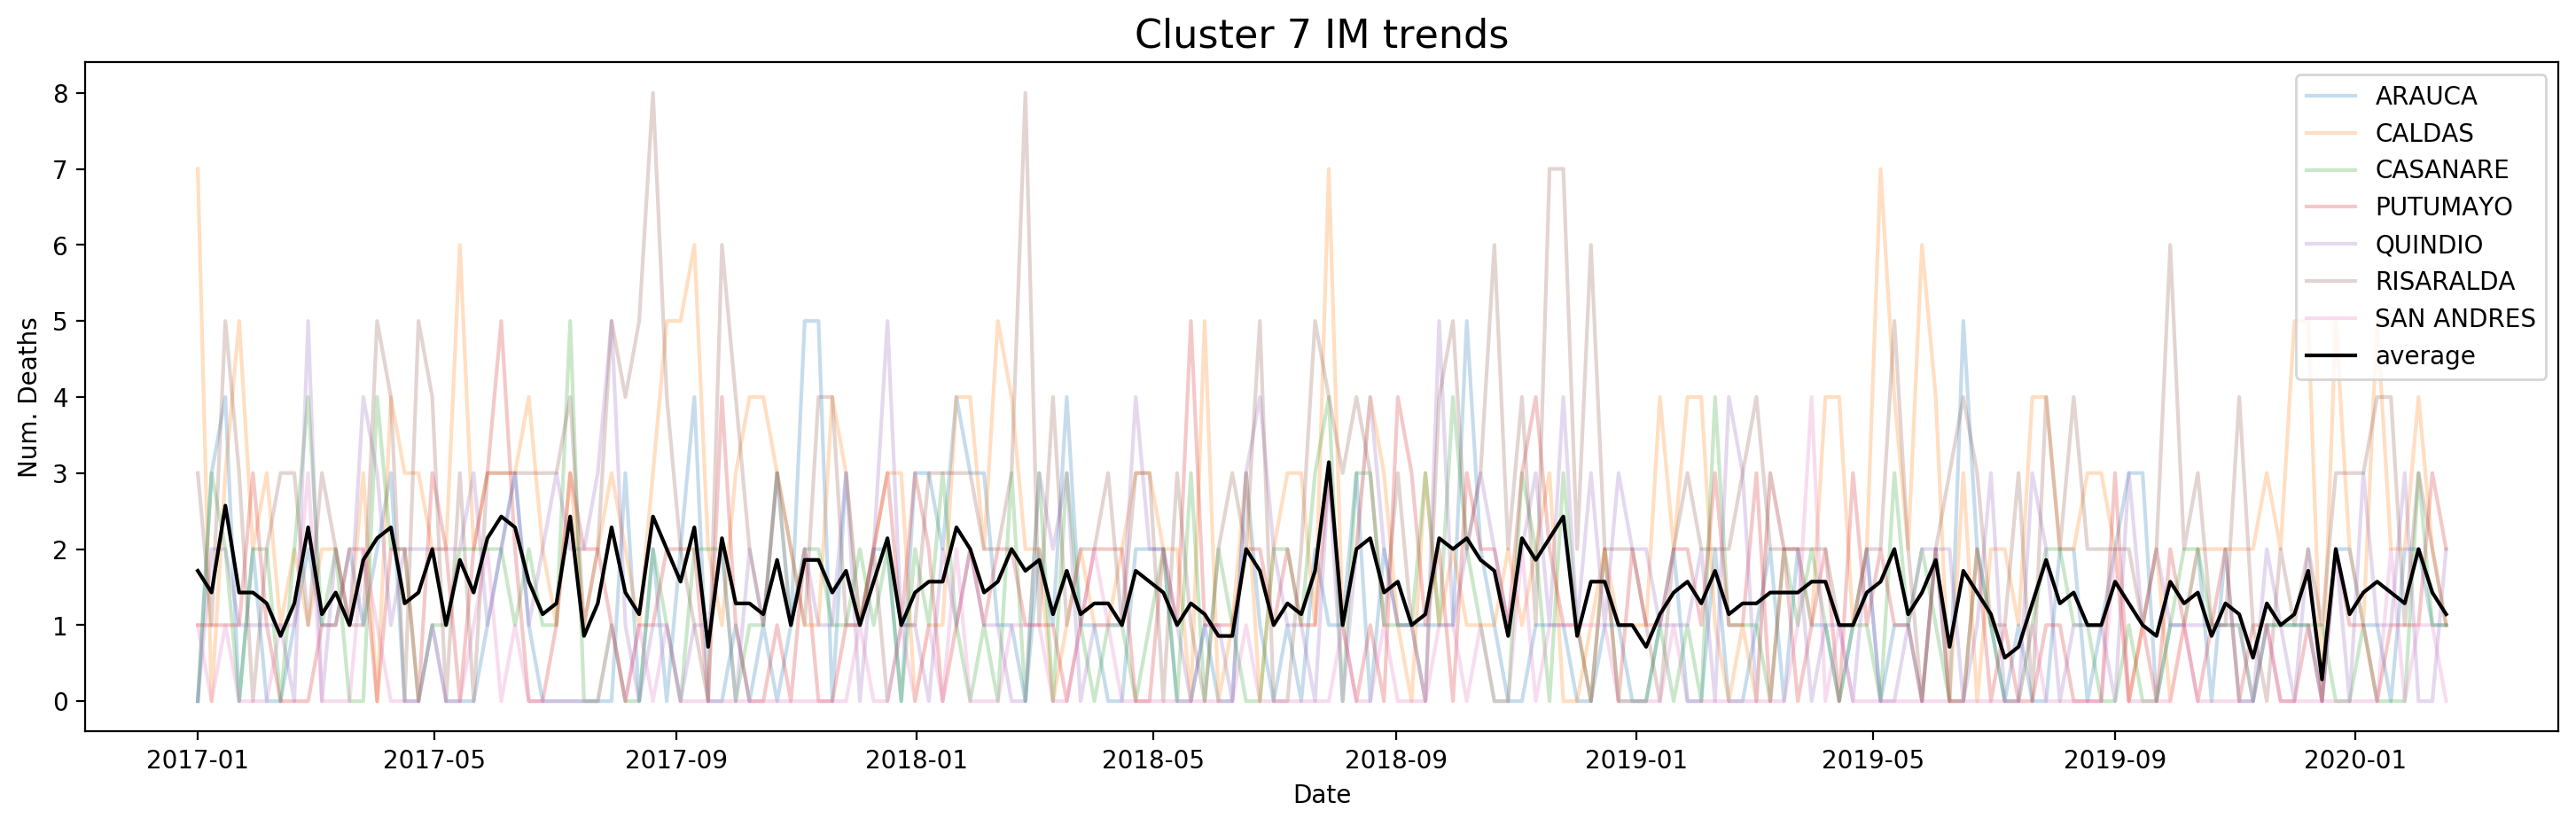

In [51]:
# Plot cluster 7
if n_cluster > 6:
    c_name = 7
    plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

### 7.5. Show results

In [52]:
df_result

n_item    std_dev  n_item_2   w_std_dev
0     6.0  12.346986      36.0   74.081914
1     2.0   7.877655       4.0   15.755311
2    10.0  16.111462     100.0  161.114616
3     6.0  13.837553      36.0   83.025317
4     1.0   0.000000       1.0    0.000000
5     1.0   0.000000       1.0    0.000000
6     7.0  15.713718      49.0  109.996024

In [53]:
cluster_avg_item = math.sqrt(np.mean(df_result['n_item_2'].values))
avg_wn_std_dev = np.sum(df_result['w_std_dev'].values) / np.sum(df_result['n_item'].values)
print('Avg Items by Cluster: %0.4f' % cluster_avg_item)
print('Avg WN Std Dev: %0.4f' % avg_wn_std_dev)

Avg Items by Cluster: 5.6946
Avg WN Std Dev: 13.4537


---
End of analysis